In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

## We'll use the titanic dataset

In [4]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## Checking for missing values

In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

## As there's missing values we need to remove them for transformation 

In [8]:
df = df.copy()

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

## To make sure if there's any missing values now

In [13]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

## We'll assign x and y values

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### X is Age and Fare
### Y is Survived

In [15]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

## Spliting train test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Now plotting the Age column to see if it's normally distributed
## As we can see it's not a perfect normally distributed but we can say it is

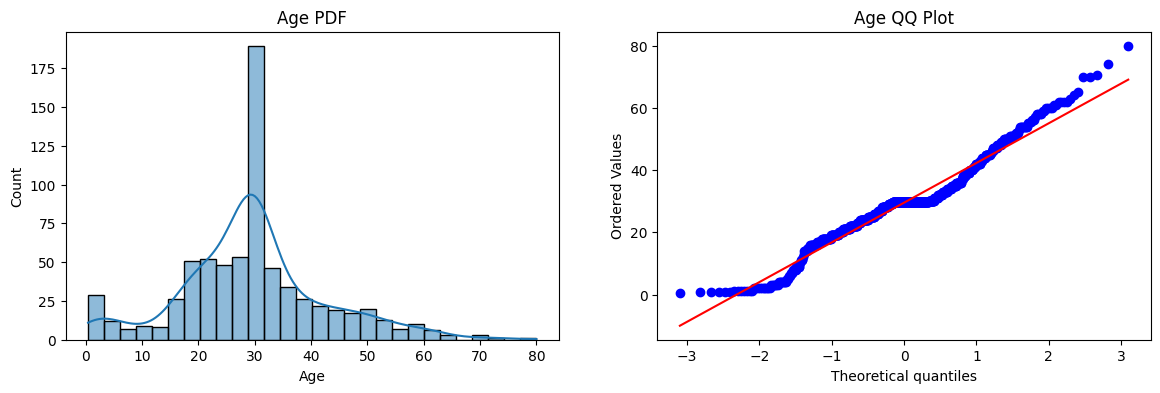

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

## Now let's look at the fare column
## As we can see it's right skewed actually, So we have to apply log transform

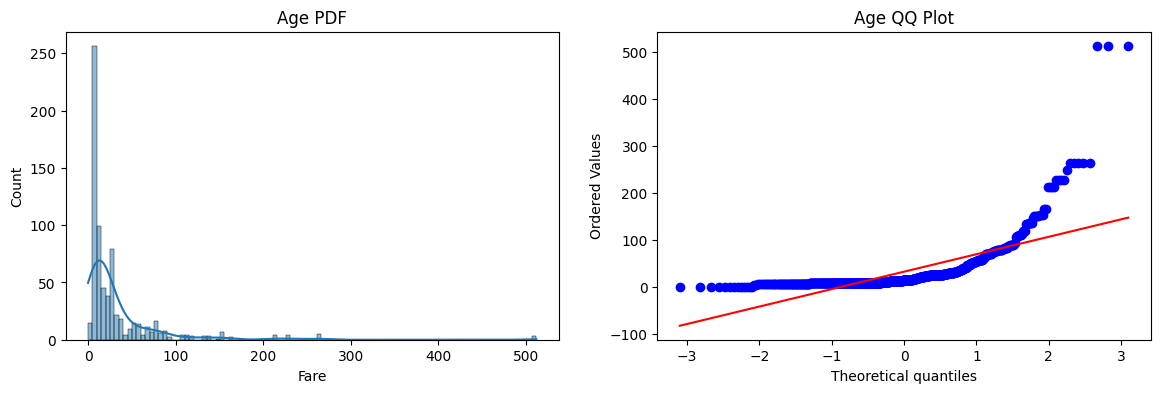

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

## Now we're not applying any transformation right now we're just creating two objects of two classifier to see the result without transformation

In [23]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

## Now training and prediction
## So as we can see this is the accuracy without transformation

In [24]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6983240223463687


## Now applying transformation
## Calling FunctionTransformer from sklearn; inside it we need to pass the function, here instead of log we used log1p because log1p add 1 to all the values before transformation it's a precaution we should take if there's any values are 0 in the data

In [25]:
trf = FunctionTransformer(func=np.log1p)

## Now for the transformed X_train values and X_test values

In [26]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

## Now training and prediction
## As we can see LogisticRegression accuracy is improved but DecisionTree is not because DT is one of the algorithm that transformation won't really change anything because it wouldn't affect by the distribution of the data.

In [27]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


## To make sure the new accuracy is accurate. Let's do cross validation to make sure.
## As we can see there is improvement.

In [28]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588264669163546


## Now if we plot the improvements before and after transformation on Fare column

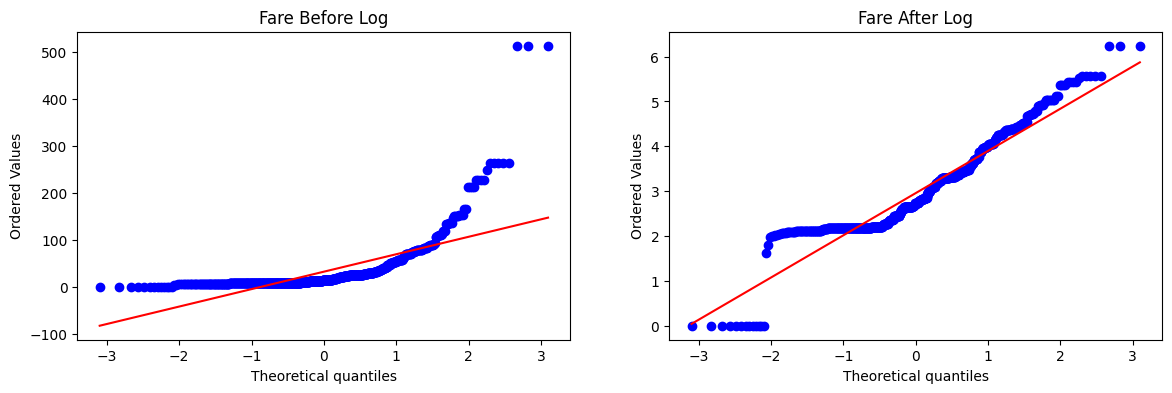

In [29]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

## Changes after tranformation on Age column, as we can see it didn't really help. because Age wasn't right skewed but we applied log transformation on it

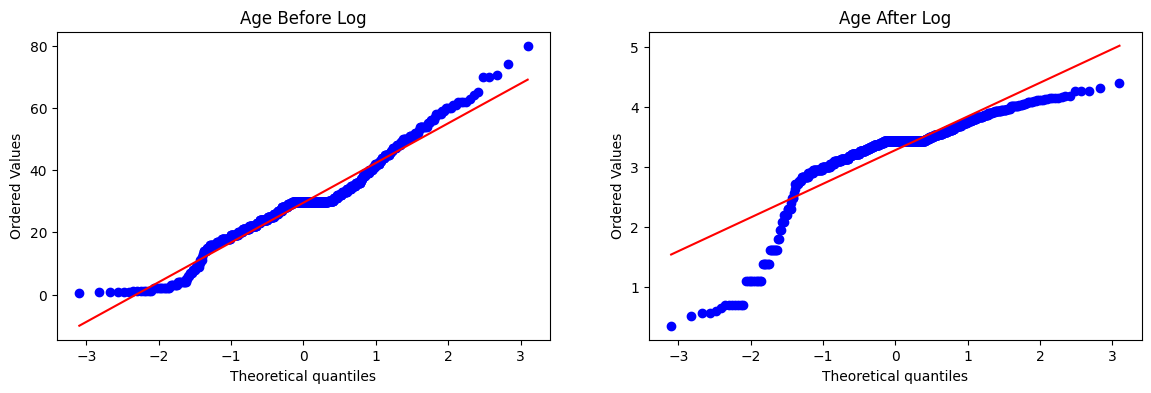

In [31]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

## So rather than appling log transformation on both the column let's just apply only on Fare column

In [32]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [33]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


## For cross validation

In [34]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577153558052434


## Here we logic the same code inside a function

In [36]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

## Let's apply without any transformation, as we can see no changes on Fare

Accuracy 0.6589013732833957


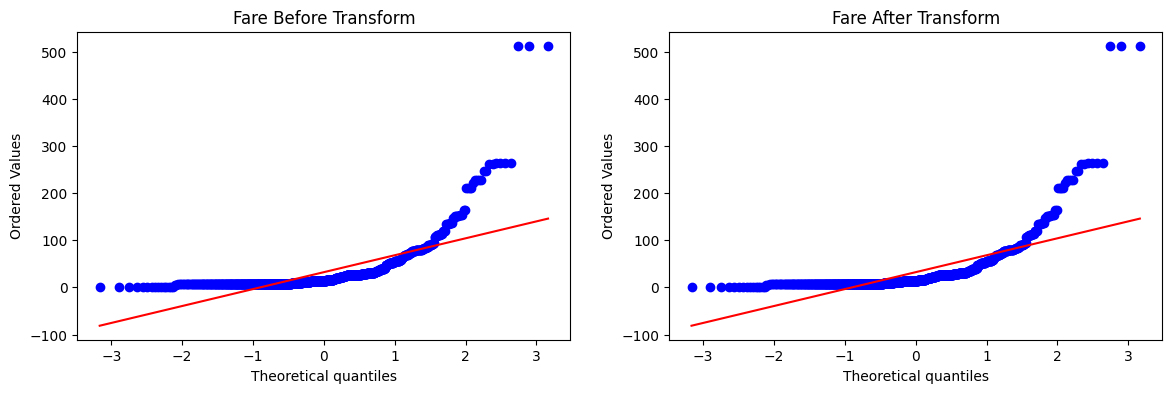

In [37]:
apply_transform(lambda x:x)

## Applying x square, made it worse

Accuracy 0.6431335830212235


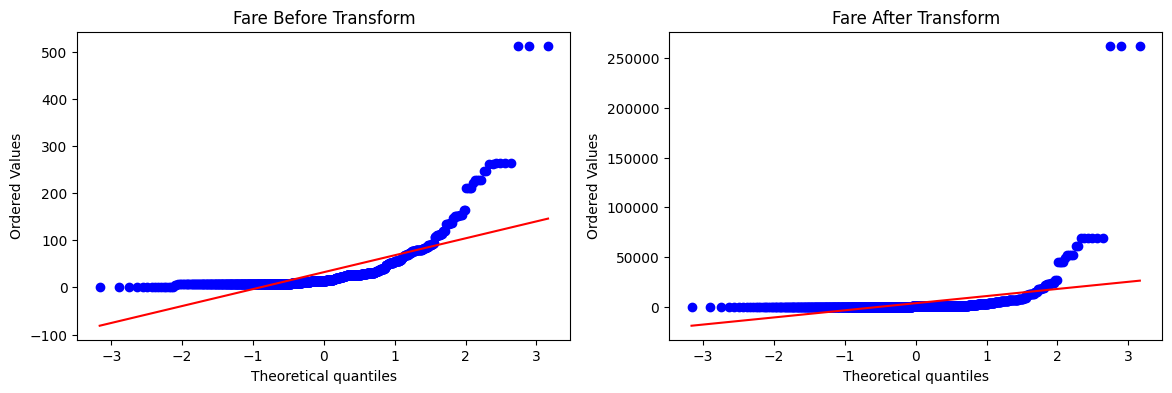

In [38]:
apply_transform(lambda x: x**2)

## Let's try with reciprocal
## Error because maybe denominator becoming 0 some how

In [39]:
apply_transform(lambda x: 1/x)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sourabh Samanta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sourabh Samanta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sourabh Samanta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sourabh Samanta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sourabh Samanta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Sourabh Samanta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "c:\Users\Sourabh Samanta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\Sourabh Samanta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float64').


## As we can see accuracy decrease 

Accuracy 0.61729088639201


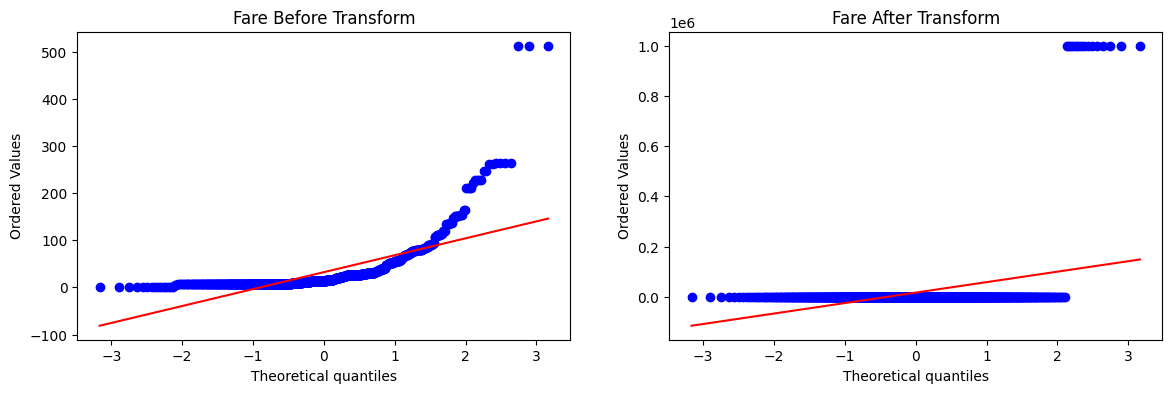

In [40]:
apply_transform(lambda x:1/(x+0.000001))